### This notebook showcases the the analysis and development of the Eos30f3 Model Reproducibilty done by malik badmus as part of the task for outreachy 2024 contribution.

***For the sake of clarity, i will refer to the author's model as DPMN-hERG Model, and the Model implemented on Ersilia Model Hub as eos30f3 model***


In [101]:
import os
import sys
import pandas as pd
# search path for modules 
sys.path.append(os.path.abspath("../src"))
DATAPATH = "../data"
SRC= "../src"

#File path
input_file_path = os.path.join(DATAPATH, "Raw", "Cai_TableS3_fixed.csv")

# Reading the CSV file into a pandas DataFrame
Original_data = pd.read_csv(input_file_path, delimiter=',')

***Inspect the Datasets**

In [102]:
Original_data.head()

,smiles,X10,X20,X40,X60,X80,X100
0,C=1([C@@H](C(=C(C)NC1C)C(OC)=O)c1cc(ccc1)[N+](...,1,1.0,1.0,1.0,1.0,1.0
1,C1(\c2c(CCc3c1cccc3)cccc2)=C\CCN(C)C,1,1.0,1.0,1.0,1.0,1.0
2,c1(c2c(cccc2)oc1CCCC)C(c1cc(c(OCCN(CC)CC)c(c1)...,1,1.0,1.0,1.0,1.0,1.0
3,[H][C@H]1CC[C@@H](C#N)C1C(=O)C3CN(C(C)c2ccc(C#...,1,1.0,1.0,1.0,1.0,1.0
4,[nH]1ccnc1-c2ccc(cc2)OCCCN3CCCCC3,1,1.0,1.0,1.0,1.0,1.0


In [103]:
Original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7889 entries, 0 to 7888
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  7889 non-null   object 
 1   X10     7889 non-null   int64  
 2   X20     6548 non-null   float64
 3   X40     5434 non-null   float64
 4   X60     5161 non-null   float64
 5   X80     4940 non-null   float64
 6   X100    4831 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 431.6+ KB


***Predictions were run both on DPMN-hERG Model and eos30f3 Model, the prediction result for both model was saved in data/Model_predictions***

In [104]:
DPMN_hERG_predictions = pd.read_csv(os.path.join(DATAPATH, "Model_predictions", "chem_pred.csv"))

eos30f3_hERG_predictions = pd.read_csv(os.path.join(DATAPATH, "Model_predictions", "eos30f3_predictions.csv"))

In [105]:
DPMN_hERG_predictions.head()

,smiles,X10,X20,X40,X60,X80,X100
0,C=1([C@@H](C(=C(C)NC1C)C(OC)=O)c1cc(ccc1)[N+](...,0.292403,0.412053,0.460070,0.501986,0.543854,0.558681
1,C1(\c2c(CCc3c1cccc3)cccc2)=C\CCN(C)C,0.967161,0.989731,0.997489,0.998869,0.999417,0.999396
2,c1(c2c(cccc2)oc1CCCC)C(c1cc(c(OCCN(CC)CC)c(c1)...,0.933646,0.965634,0.974456,0.976747,0.982851,0.982998
3,[H][C@H]1CC[C@@H](C#N)C1C(=O)C3CN(C(C)c2ccc(C#...,0.704302,0.878754,0.963363,0.978542,0.988864,0.988917
4,[nH]1ccnc1-c2ccc(cc2)OCCCN3CCCCC3,0.833504,0.977537,0.997565,0.999514,0.999811,0.999797


In [106]:
eos30f3_hERG_predictions.head()

,key,input,activity
0,PVHUJELLJLJGLN-MRXNPFEDSA-N,C=1([C@@H](C(=C(C)NC1C)C(OC)=O)c1cc(ccc1)[N+](...,0.148929
1,KRMDCWKBEZIMAB-UHFFFAOYSA-N,C1(\c2c(CCc3c1cccc3)cccc2)=C\CCN(C)C,0.873658
2,IYIKLHRQXLHMJQ-UHFFFAOYSA-N,c1(c2c(cccc2)oc1CCCC)C(c1cc(c(OCCN(CC)CC)c(c1)...,0.853444
3,JCGAMUKFIGRQFG-BMRFCAOMSA-N,[H][C@H]1CC[C@@H](C#N)C1C(=O)C3CN(C(C)c2ccc(C#...,0.772669
4,FHBHXTHCXKMLDG-UHFFFAOYSA-N,[nH]1ccnc1-c2ccc(cc2)OCCCN3CCCCC3,0.899602


***Calculating the AUC score and plotting the ROC curve for DPMN-hERG model***

AUC = 0.963 ± 0.002


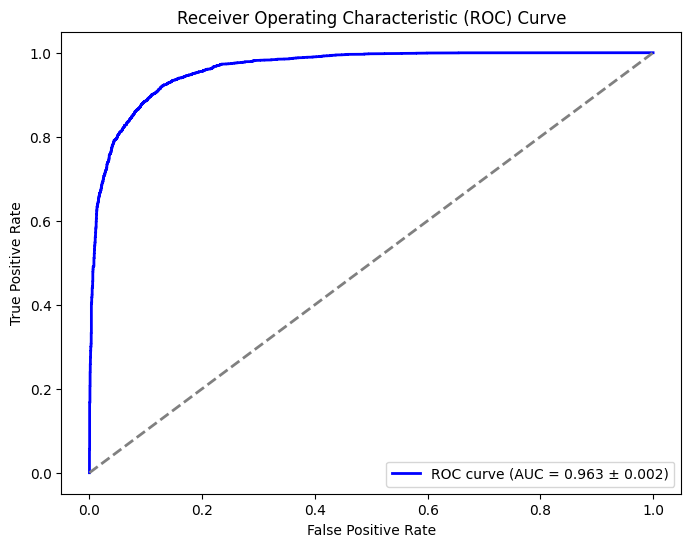

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Calculating  ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Original_data['X10'], DPMN_hERG_predictions['X10'])
auc = roc_auc_score(Original_data['X10'], DPMN_hERG_predictions['X10'])

# Calculating bootstrapped AUC values
n_bootstraps = 1000
auc_values = np.zeros(n_bootstraps)
for i in range(n_bootstraps):
    indices = np.random.choice(len(Original_data['X10']), len(Original_data['X10']), replace=True)
    auc_values[i] = roc_auc_score(Original_data['X10'].iloc[indices], DPMN_hERG_predictions['X10'].iloc[indices])

# Compute standard error
auc_std_error = np.std(auc_values)
print(f"AUC = {auc:.3f} ± {auc_std_error:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.3f} ± {auc_std_error:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


***Calculating the auc score and plotting the ROC curve for eos30f3 model***

AUC = 0.669 ± 0.006


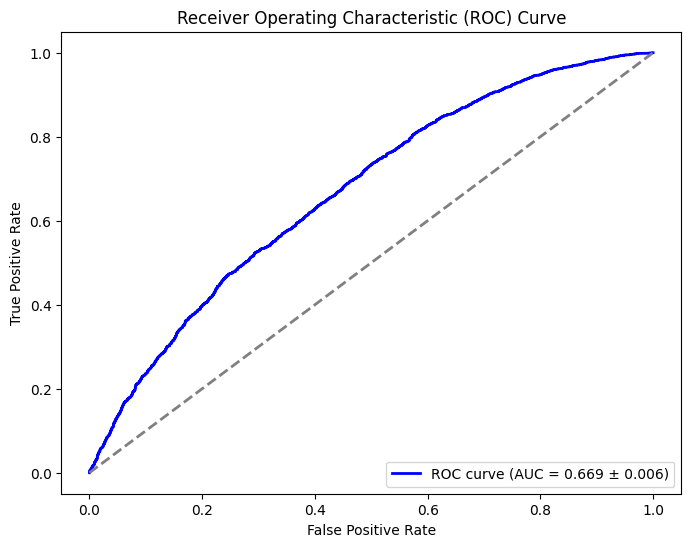

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Original_data['X10'], eos30f3_hERG_predictions['activity'])
auc = roc_auc_score(Original_data['X10'], eos30f3_hERG_predictions['activity'])

# Calculate bootstrapped AUC values
n_bootstraps = 1000
auc_values = np.zeros(n_bootstraps)
for i in range(n_bootstraps):
    indices = np.random.choice(len(Original_data['X10']), len(Original_data['X10']), replace=True)
    auc_values[i] = roc_auc_score(Original_data['X10'].iloc[indices], eos30f3_hERG_predictions['activity'].iloc[indices])

# Compute standard error
auc_std_error = np.std(auc_values)

# Print AUC with ± standard error
print(f"AUC = {auc:.3f} ± {auc_std_error:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.3f} ± {auc_std_error:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
